# Cours accéléré analyse numérique - M2 AMS - 2023/2024


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


$$\newcommand{\nr}[1]{\|#1\|}
\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
$$

## Méthode des différences finies pour les EDP.


**Remarques importantes** : Dorénavant vous allez programmer des méthodes numériques pour résoudre de manière approchée des EDP, et la complexité de vos programmes augmentera au fur et à mesure. Il faut veiller à respecter les points suivants:

- Vos programmes doivent être ***souples***, ce qui veut dire qu'on devra pouvoir changer les données du problème  sans avoir à tout refaire et même modifier facilement les programmes pour les adapter à un problème plus complexe (avec d'autre type de données, par exemple). Vous devrez donc utiliser des variables pour définir vos données, éventuellement des fonctions externes définies en dehors du programme principal, etc...

- Vos programmes doivent être ***lisibles et compréhensibles*** par quelqu'un d'autre que vous et par vous mêmes si vous y revenez quelques jours plus tard. Il faut donc utiliser des noms cohérents pour les variables, des commentaires pour expliquer le programme, des titres et légendes pour vos graphiques, etc...

**Exercice 1 - l'équation de Poisson 1D. Conditions aux limites de Dirichlet et de Neumann. Ordre de convergence.**

 1. **Conditons aux limites de Dirichlet homogènes.**

On s'intéresse à la résolution approchée, par la méthode des différences finies, d'un problème aux limites pour l'équation de Poisson en dimension $1$ d'espace sur $\Omega=]a,b[$, $a,\ b\in\RR$, avec conditions aux limites de Dirichlet homogènes
\begin{equation}
(P)\ \ \ \ \ \begin{cases}
-u''(x)=f(x),\ \,x\in]a,b[,\\
u(a)=0,\ \,u(b)=0,
\end{cases}
\end{equation}
où $f\in\mathcal{C}^2(\RR)$ est donnée.

Comme on l'a vu, la méthode des différences finies pour le problème (P) consiste à, pour $M>1$ entier positif donné, chercher des réels $u_0,\dots,u_{M+1}$ vérifiant

\begin{equation}
(P_h)\ \ \ \ \   \begin{cases}
    -\frac{1}{h^2}\big(u_{j+1}-2u_{j}+u_{j-1}\big)=f(x_j),\ \  j=1,\dots,M,\\
    u_0=u_{M+1}=0,
  \end{cases}
\end{equation}

où $h=\frac{b-a}{M+1}$ et $x_j=a+jh,\ j=0,\dots,M+1.$


On pose $ U_h = (u_1,\dots, u_M)$ et $ F_h = (f(x_1),\dots,f(x_M)).$ Le problème discret (P_h) peut s'écrire de manière équivalente :

Pour $M>1,\ M\in\N,$ donné, trouver $(u_0,u_1,\dots,u_M,u_{M+1})\in\RR^{M+2}$ tel que

\begin{equation}
(S)\ \ \ \ \ \begin{cases}
  u_0=u_{M+1}=0,\\
  (S_h)\ \ \ A_h{U_h}=F_h,
\end{cases}
\end{equation}

avec $A_h\in\mathcal{M}^M(\RR)$ la matrice
  \begin{equation*}
A_h=-\frac{1}{h^2}\left[\begin{array}{rrrrrr}
                          -2&1&0&&\cdots&0\\
                          1&-2&1&&\cdots&0\\
                          0&1&-2&&\cdots&0\\
                          \vdots&&\ddots&\ddots&\ddots&\vdots\\
                          0&\cdots&&1&-2&1\\
                          0&\cdots&&0&1&-2
                        \end{array}
                      \right]\ \, ;
  \end{equation*}

Pour des questions pratiques on va résoudre le système $(S_h)$ sous la forme équivalente 

$$
A_M U_h=h^2 F,
$$

où $A_M\in\mathcal{M}_M(\RR)$ est la matrice $h^2 A_h$ (qui ne dépend plus explicitement de $h$ ; rappelons que le pas $h$ et $M$ sont liés par la relation $h=(b-a)/(M+1)$. 

-----------------------------------------------------------------------------------------------------------

On considère $a=0,\ b=1$, $f(x) = (2\pi)^2 \sin(2\pi x)$, de sorte que la solution du problème $(P)$ est donnée par $u(x) = \sin(2\pi x)$. 

**Question 1.** 
Implementer en python une fonction `A(M)` qui retourne la matrice $A_M$, pour un nombre de points M donné. 

*Commandes utiles :* `np.eye(M,k=1)`, `np.eye(M,k=-1)`.

**Question 2.** Soit $M=49$. Obtenir la solution approchée $U_h$ en résolvant le système linéaire $A_M U_h =h^2 F$, en utilisant la fonction de numpy `np.linalg.solve`. Tracer sur la même figure  la solution approchée et la solution analytique.

---------------------------------------------------------------------------------------------------------------

On cherche à illustrer numériquement la convergence du schéma aux différences finies $(P_h)$ : la solution $(u_0,\dots,u_{M+1})$ du problème discret $(P_h)$ approche la solution $u$ du problème continu $(P)$ au sens suivant :

  $$
  \lim_{h\to0}\left(\max_{j=0,\dots,M+1}|u(x_j)-u_j|\right)=0.
  $$

**Question 3.** Pour $M=2^{k}$, et donc pour $h=\frac{1}{2^k +1}$, $2\le k\le 11$, calculer et représenter dans un même graphique la différence en valeur absolue entre la solution exacte aux points $x_j$ et la solution approchée. Observer que cette différence décroit avec $h$.

------------------------------------------------------------------------------------------------------------------

Pour $h>0$ fixé, on note

$$
e_h:=\max_{j=0,\dots,M+1}|u(x_j)-u_j|
$$

l'erreur global du schéma associée à une discrétisation de pas $h$. On a la convergence

$$
\lim_{h\to0} e_h=0,
$$

et cette convergence a lieu *au moins à l'ordre 2*, dans le sens que la propriété suivante se vérifie : il existe une constante $C>0$, indépendante de $h$, tel que

$$
e_h\leq C h^2.
$$

**Question 4.**
Calculer, pour chaque valeur de $h$ associée à $M=2^{k}$, $2\le k\le 11$, l'erreur globale en norme infinie entre la solution approchée et la solution exacte, définie par  

$$
e_h=\max_{1\le j\le M}|u_{j}-u(x_{j})|.
$$

Représenter dans une même figure $e_h$ en fonction de $h,$ ainsi qu'une droite de pente 1 et une droite de pente 2, en utilisant une échelle logarithmique. Les résultats obtenus doivent illustrer numériquement le fait que la méthode des différences finies est d'ordre $2$ pour ce problème. 


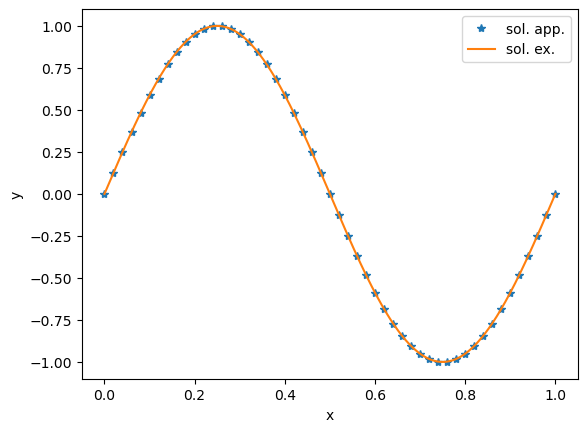

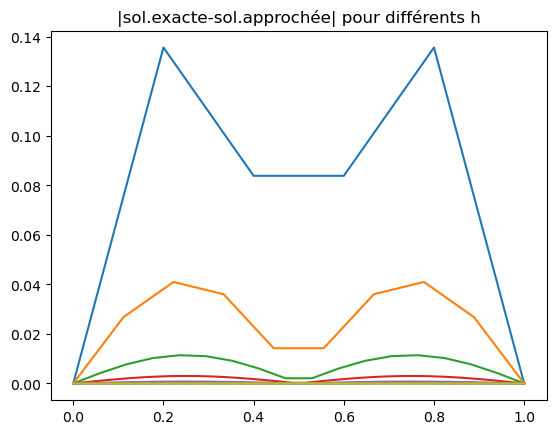

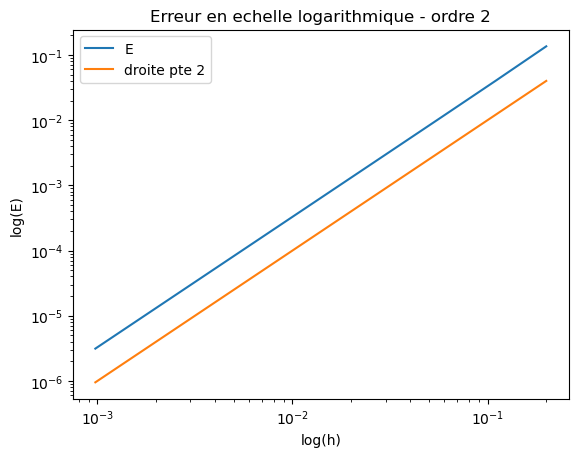

In [2]:

a=0
b=1

u_a=0
u_b=0

M=49
h=1/(M+1)

x=np.linspace(a,b,M+2)

def uex(x):
    return np.sin(2*np.pi*x)

def f(x):
    return (2*np.pi)**2*np.sin(2*np.pi*x)

def A(n):
    return 2*np.eye(n)-np.diag(np.ones(n-1),1)-np.diag(np.ones(n-1),-1)

F=(h**2)*f(x[1:-1])
U=np.zeros(M+2)
U[1:-1]=np.linalg.solve(A(M),F)

plt.figure(1)
plt.plot(x,U,'*',label='sol. app.')
xx=np.linspace(a,b,1001)
plt.plot(xx,uex(xx),label='sol. ex.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

vecE=[]
vecH=[]
plt.figure(2)
for k in range(2,11):
    M=2**k
    h=1/(M+1)
    x=np.linspace(a,b,M+2)
    F=(h**2)*f(x[1:-1])
    U=np.zeros(M+2)
    U[1:-1]=np.linalg.solve(A(M),F)
    plt.plot(x,abs(U-uex(x)))
    vecE.append(np.max(np.abs(U-uex(x))))
    vecH.append(h)
plt.title('|sol.exacte-sol.approchée| pour différents h')

plt.figure(3)
plt.loglog(vecH,vecE,label='E')
plt.loglog(np.array(vecH),np.array(vecH)**2,label='droite pte 2')
plt.xlabel('log(h)')
plt.ylabel('log(E)')
plt.title('Erreur en echelle logarithmique - ordre 2')


 2. **Conditions de Dirichlet non homogènes.**

On approche à présent le problème de Dirichlet $-u''=f$ dans un intervalle $]a,b[$, avec $a,\ b\in\RR$, avec conditions de Dirichlet non-homogènes : 

$$
\left\{\begin{aligned}
&-u''(x) = f(x) \hbox{ sur } ]a,b[ \\
&u(a) = u_a, u(b) = u_b,
\end{aligned}\right.$$

où $u_a,\ u_b\in\RR$ sont données. En suivant la même démarche que dans l'exercice 1, étant donnée une discrétisation de $]a,b[$ de pas $h=\frac{(b-a)}{M+1}$, on cherche une solution approchée $(u_0,\dots,u_{M+1})$ solution du système linéaire suivant : 

$$
\left\{\begin{aligned}
&-\frac{1}{h^2}(u_{i-1} - 2 u_i + u_{i+1}) = f_(x_i) \hbox{ pour } 1\leq i\leq M \\
&u_{0} = u_a, u_{M+1} = u_b,
\end{aligned}\right.$$

où la discrétisation considérée de l'intervalle $]a,b[$ est définie par les $M+2$ points $x_i=a+ih,\ i=0,\dots,M+1$.

**Question 1.** Mettre ce système sous la forme $A_h U_h = F+\Delta$ où $\Delta \in\RR^M$ est un vecteur à déterminer.

**Question 2.** 
Donner la solution exacte du problème 
$$
\left\{\begin{aligned}
&-u''(x) = 1 \hbox{ sur } ]1,2[ \\
&u(1) = 1, \ u(2) = 2.
\end{aligned}\right.$$

**Question 3.** En suivant la démarche de l'exercice 1, calculer une solution approchée de ce problème par la méthode des différences finies, et représenter dans la même figure la solution exacte et la solution approchée. Refaire dans une autre figure les calculs de la question 4 de l'exercice 1. Refaire l'exercice pour le problème

$$
\left\{\begin{aligned}
&-u''(x) = -\frac{2}{(x+1)^3} \hbox{ sur } ]1,2[ \\
&u(1) = 1/2, u(2) = 1/3,
\end{aligned}\right.$$

pour lequel la solution exacte est donnée par $u(x)=\frac{1}{x+1}$. Chercher à comprendre les résultats obtenus, nottament chercher à comprendre pourquoi l'erreur dans le cas du premier problème est si petite (*pourquoi dans ce cas on a exactement $u''(x)=\frac{u(x+h)-2u(x)+u(x-h)}{h^2}\ \ \ $ ?*)

erreur pour h= 0.2  : 2.220446049250313e-16
erreur pour h= 0.1111111111111111  : 6.661338147750939e-16
erreur pour h= 0.058823529411764705  : 4.440892098500626e-16
erreur pour h= 0.030303030303030304  : 6.661338147750939e-15
erreur pour h= 0.015384615384615385  : 1.4654943925052066e-14
erreur pour h= 0.007751937984496124  : 2.398081733190338e-14
erreur pour h= 0.0038910505836575876  : 7.083222897108499e-14
erreur pour h= 0.001949317738791423  : 1.0613732115416497e-13
erreur pour h= 0.000975609756097561  : 4.334310688136611e-13

L'erreur est petite, et elle devrait être de l'ordre de l'erreur machine,
car la solution est un polynôme de degré 2, donc l'erreur entre la dérivé d'ordre 2 et son
approximation par DF est nulle, autrement dit la solution de (-u_{j+1}+2_j-u_{j-1})/h^2=f(x_j)
est exactement u(x_j), avec u la solution exacte du problème


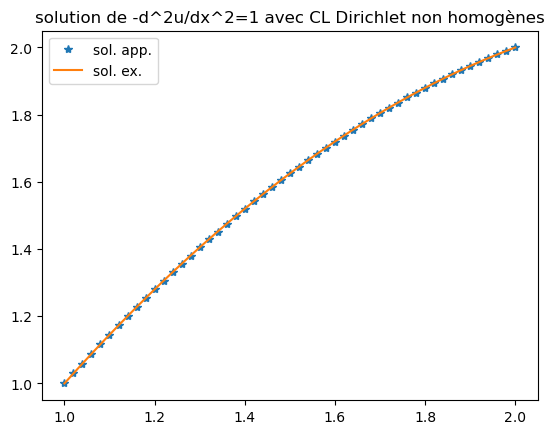

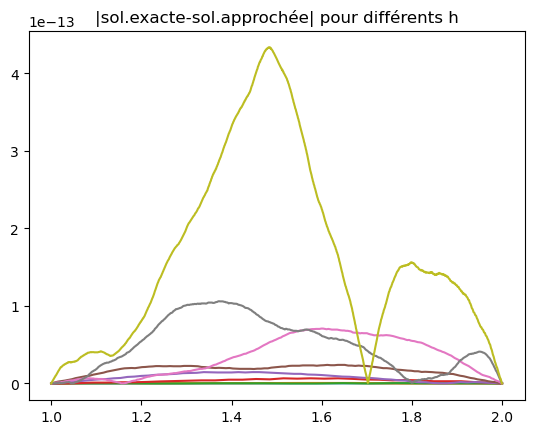

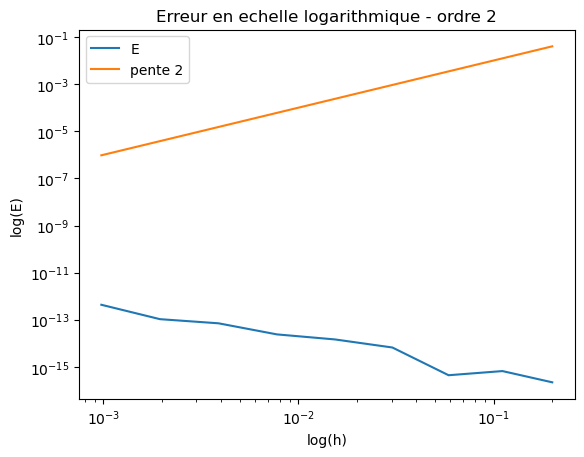

In [3]:
# Q2.
# Solution u(x)=-x**2/2+5*x/2-1

a=1
b=2
ua=1 
ub=2 

M=49

h=(b-a)/(M+1)

x=np.linspace(a,b,M+2)

def uexQ2(x):
    return -x**2/2+5*x/2-1
    #return 1/(x+1)

def fQ2(x):
    return np.ones(x.shape)
    #return -2/(x+1)**3

F=(h**2)*fQ2(x[1:-1])

Delta=np.zeros(M)
Delta[0]=ua
Delta[-1]=ub

U=np.zeros(M+2)
U[1:-1]=np.linalg.solve(A(M),F+Delta)
U[0]=ua
U[-1]=ub

plt.figure(1)
plt.plot(x,U,'*',label='sol. app.')
xx=np.linspace(a,b,1001)
plt.plot(xx,uexQ2(xx),label='sol. ex.')
plt.title('solution de -d^2u/dx^2=1 avec CL Dirichlet non homogènes')
plt.legend()

vecE=[]
vecH=[]
plt.figure(2)
for k in range(2,11):
    M=2**k
    h=(b-a)/(M+1)
    x=np.linspace(a,b,M+2)
    F=(h**2)*fQ2(x[1:-1])
    Delta=np.zeros(M)
    Delta[0]=ua
    Delta[-1]=ub
    U=np.zeros(M+2)
    U[1:-1]=np.linalg.solve(A(M),F+Delta)
    U[0]=ua
    U[-1]=ub
    plt.plot(x,abs(U-uexQ2(x)))
    vecE.append(np.max(np.abs(U-uexQ2(x))))
    vecH.append(h)
    print('erreur pour h=',h,' :',vecE[-1])
plt.title('|sol.exacte-sol.approchée| pour différents h')

print('\r')
print("L'erreur est petite, et elle devrait être de l'ordre de l'erreur machine,\r")
print("car la solution est un polynôme de degré 2, donc l'erreur entre la dérivé d'ordre 2 et son\r")
print("approximation par DF est nulle, autrement dit la solution de (-u_{j+1}+2_j-u_{j-1})/h^2=f(x_j)\r")
print("est exactement u(x_j), avec u la solution exacte du problème")

plt.figure(3)
plt.loglog(vecH,vecE,label='E')
plt.loglog(np.array(vecH),np.array(vecH)**2,label='pente 2')
plt.xlabel('log(h)')
plt.ylabel('log(E)')
plt.title('Erreur en echelle logarithmique - ordre 2')
plt.legend()



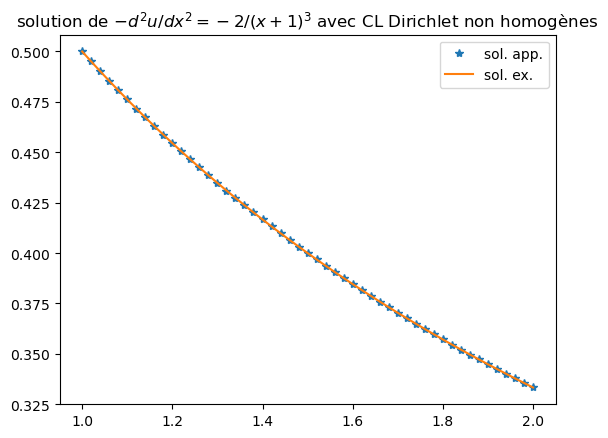

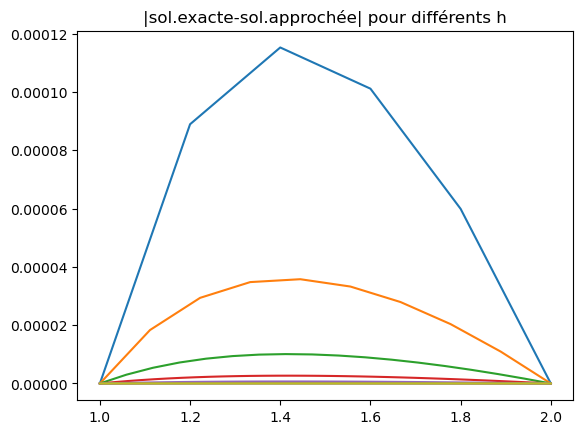

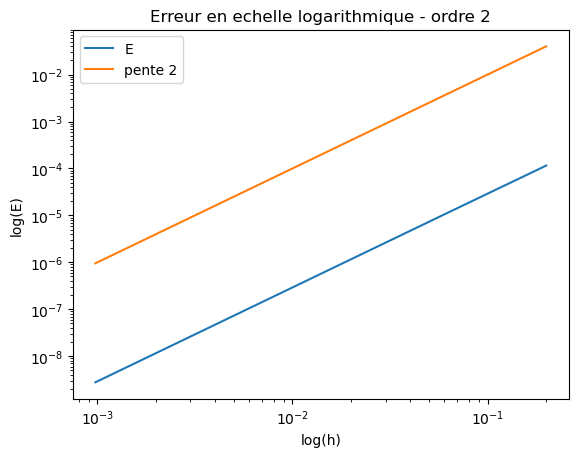

In [4]:
# Q3 f=-2/(x+1)^3

a=1
b=2
ua=1/2 
ub=1/3

M=49

h=(b-a)/(M+1)

x=np.linspace(a,b,M+2)

def uexQ3(x):
    return 1/(x+1)

def fQ3(x):
    return -2/(x+1)**3

F=(h**2)*fQ3(x[1:-1])

Delta=np.zeros(M)
Delta[0]=ua
Delta[-1]=ub

U=np.zeros(M+2)
U[1:-1]=np.linalg.solve(A(M),F+Delta)
U[0]=ua
U[-1]=ub

plt.figure(1)
plt.plot(x,U,'*',label='sol. app.')
xx=np.linspace(a,b,1001)
plt.plot(xx,uexQ3(xx),label='sol. ex.')
plt.title('solution de $-d^2u/dx^2=-2/(x+1)^3$ avec CL Dirichlet non homogènes')
plt.legend()

vecE=[]
vecH=[]
plt.figure(2)
for k in range(2,11):
    M=2**k
    h=(b-a)/(M+1)
    x=np.linspace(a,b,M+2)
    F=(h**2)*fQ3(x[1:-1])
    Delta=np.zeros(M)
    Delta[0]=ua
    Delta[-1]=ub
    U=np.zeros(M+2)
    U[1:-1]=np.linalg.solve(A(M),F+Delta)
    U[0]=ua
    U[-1]=ub
    plt.plot(x,abs(U-uexQ3(x)))
    vecE.append(np.max(np.abs(U-uexQ3(x))))
    vecH.append(h)
plt.title('|sol.exacte-sol.approchée| pour différents h')

plt.figure(3)
plt.loglog(vecH,vecE,label='E')
plt.loglog(np.array(vecH),np.array(vecH)**2,label='pente 2')
plt.xlabel('log(h)')
plt.ylabel('log(E)')
plt.title('Erreur en echelle logarithmique - ordre 2')
plt.legend()


3. **Conditions aux limites de Neumann.**

On approche dans cette partie le problème $-u'' + u=f$ dans $]0,1[$, avec conditions aux limites dites de Neumann (homogènes) : 

$$
\left\{\begin{aligned}
&-u''(x) + u(x) = f(x) \hbox{ sur } ]0,1[ \\
&u'(0) = u'(1) = 0.
\end{aligned}\right.$$

On considère la même discrétisation que dans l'exercice 1 de l'intervalle $]0,1[$ et on effectue les approximations suivantes des dérivées de la solution $u$ aux points 0 et 1 :

$$
u'(0)\simeq \frac{u(h)-u(0)}{h},\ \ \ \ \ u'(1)\simeq \frac{u(1)-u(1-h)}{h}
$$

On cherche alors, pour $M>0$ donné et $h=\frac{1}{M+1}$, des valeurs $u_0,\dots,u_{M+1}$ approchant la solution exacte aux points $x_0,\dots,x_{M+1},\ $ solutions du système linéaire 

$$
\left\{\begin{aligned}
&\frac{u_{1} - u_0}{h} = 0,\ \ \ \ \  \frac{u_{M+1} - u_M}{h} = 0 \\[4pt]
&-\frac{1}{h^2}(u_{i-1} - 2 u_i + u_{i+1})+u_i = f(x_i) \hbox{ pour } 1\leq i\leq M
\end{aligned}\right.,$$

où $x_j = h j$ pour $0\leq j\leq M+1.$

Le problème discret peut être écrit à nouveau sous la forme $(\tilde{A}_h + I_M)U = F$ où $\tilde{A}_h$ est une matrice de taille $M\times M$, $I_M$ l'identité de taille $M$, $U = (u_1,\dots,u_{M}) \in\RR^M$, et où $F = (f(x_1),\dots,f(x_M))$.

**Question 1.** Donner l'expression de la matrice $\tilde{A}_h$ et l'implémenter dans une fonction python.

**Question 2.** En prenant $f(x) = ((2\pi)^2 + 1) \cos(2\pi x)$ (et on a donc $u(x) = \cos(2\pi x)$), refaire les mêmes figures que dans l'exercice 1. Montrer que la convergence dans ce cas est d'ordre $1$ mais pas d'ordre $2$.


Text(0.5, 1.0, 'Erreur en echelle logarithmique - ordre 1')

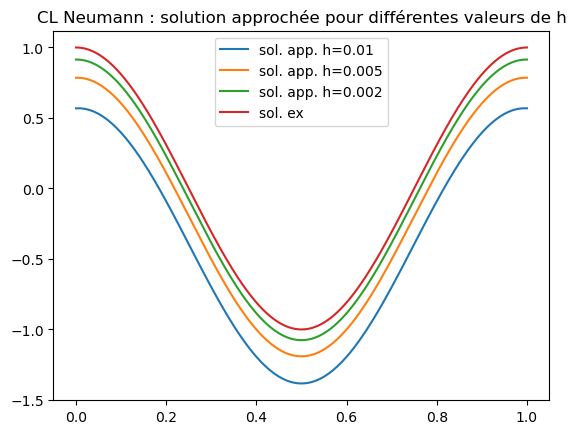

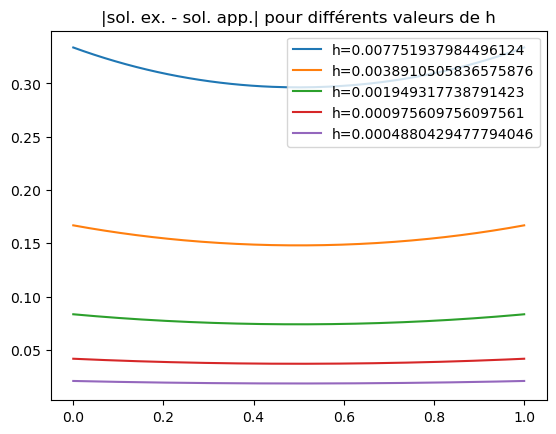

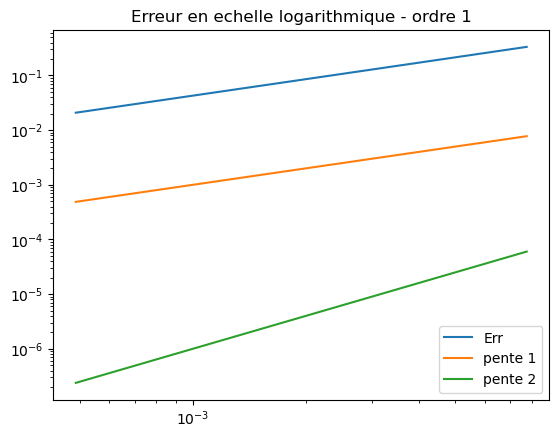

In [5]:
a=0
b=1

MM=[99,199,499]

def uex(x):
    return np.cos(2*np.pi*x)

def f(x):
    return ((2*np.pi)**2+1)*np.cos(2*np.pi*x)

def A(n):
    M=2*np.eye(n)-np.diag(np.ones(n-1),1)-np.diag(np.ones(n-1),-1)
    return M

plt.figure(1)
for M in MM:
    x=np.linspace(a,b,M+2)
    h=(b-a)/(M+1)
    F=(h**2)*f(x[1:-1])
    U=np.zeros(M+2)
    AA=A(M)
    AA[0,0]=1
    AA[-1,-1]=1
    U[1:-1]=np.linalg.solve(AA+h**2*np.eye(M),F)
    U[0]=U[1]
    U[-1]=U[-2]
    plt.plot(x,U,label='sol. app. h=' +str(h))
    
xx=np.linspace(a,b,1001)
plt.plot(xx,uex(xx),label='sol. ex')
plt.legend()
plt.title('CL Neumann : solution approchée pour différentes valeurs de h')

vecE=[]
vecH=[]
plt.figure(2)
for k in range(7,12):
    M=2**k
    h=1/(M+1)
    x=np.linspace(a,b,M+2)
    F=(h**2)*f(x[1:-1])
    U=np.zeros(M+2)
    AA=A(M)
    AA[0,0]=1
    AA[-1,-1]=1
    U[1:-1]=np.linalg.solve(AA+h**2*np.eye(M),F)
    U[0]=U[1]
    U[-1]=U[-2]
    plt.plot(x,abs(U-uex(x)),label='h='+str(h))
    vecE.append(np.max(np.abs(U-uex(x))))
    vecH.append(h)
plt.legend()
plt.title('|sol. ex. - sol. app.| pour différents valeurs de h')

plt.figure(3)
plt.loglog(vecH,vecE,label='Err')
plt.loglog(np.array(vecH),np.array(vecH),label='pente 1')
plt.loglog(np.array(vecH),np.array(vecH)**2,label='pente 2')
plt.legend()
plt.title('Erreur en echelle logarithmique - ordre 1')



4. **Méthode d'ordre 2 pour les conditions de Neumann**

On considère à nouveau le problème $-u'' + u=f$ avec conditions de Neumann : 

$$
\left\{\begin{aligned}
&-u''(x) + u(x) = f(x) \hbox{ sur } ]0,1[ \\
&u'(0) = u'(1) = 0
\end{aligned}\right.$$

**Question 1 :** En partant de l'égalité
$ u(h) = u(0) + hu'(0) + \frac{h^2}{2} u''(0) + O(h^3), $
réécrite sous la forme
$$
\begin{align*}
u'(0) &= \frac{1}{h} \big(u(h) - u(0) - \frac{h^2}{2} u''(0)\big) + O(h^2) \\
&= \frac{1}{h} \big(u(h) - u(0)\big) + \frac{h}{2} \big(f(0) - u(0)\big)  + O(h^2) 
\end{align*}
$$
proposer une discrétisation d'ordre deux pour la condition $u'(0) = 0$. Mettre le schéma sous la forme $AU = F + \Delta$ où $A$ (taille $M\times M$) et $\Delta\in\Rsp^M$ sont à déterminer.

**Question 2 :** Vérifier numériquement qu'on obtient effectivement une méthode d'ordre $2$.

Text(0.5, 1.0, 'Erreur en echelle logarithmique - ordre 1')

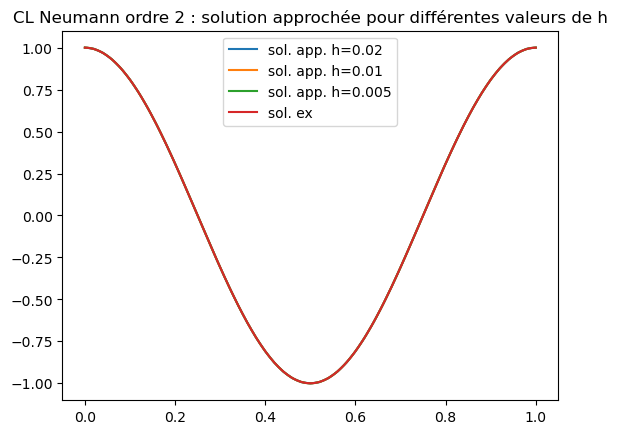

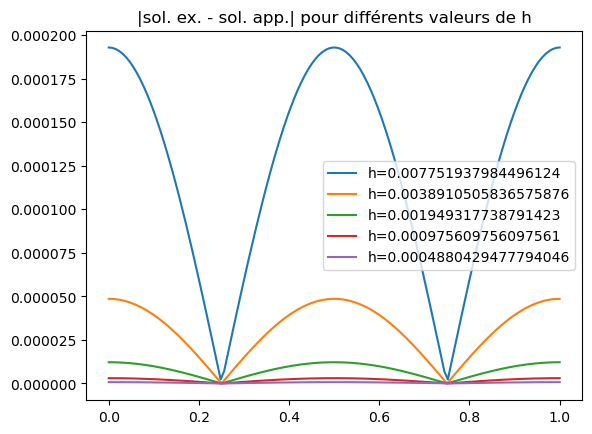

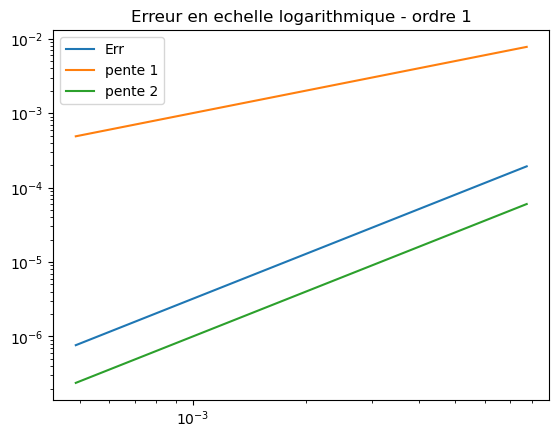

In [6]:
MM=[49,99,199]

plt.figure(1)
for M in MM:
    
    x=np.linspace(a,b,M+2)
    h=(b-a)/(M+1)
    
    AA=A(M)
    AA[0,0]+=-2/(2+h**2)
    AA[-1,-1]+=-2/(2+h**2)
    
    F=(h**2)*f(x[1:-1])
    F[0]+=f(a)*(h**2)/(2+h**2)
    F[-1]+=f(b)*(h**2)/(2+h**2)

    U=np.zeros(M+2)
    U[1:-1]=np.linalg.solve(AA+h**2*np.eye(M),F)
    U[0]=(2/(2+h**2))*U[1]+((h**2)/(2+h**2))*f(a)
    U[-1]=(2/(2+h**2))*U[-2]+((h**2)/(2+h**2))*f(b)

    plt.plot(x,U,label='sol. app. h=' +str(h))
    
xx=np.linspace(a,b,1001)
plt.plot(xx,uex(xx),label='sol. ex')
plt.legend()
plt.title('CL Neumann ordre 2 : solution approchée pour différentes valeurs de h')


vecE=[]
vecH=[]
plt.figure(2)
for k in range(7,12):
    M=2**k
    h=(b-a)/(M+1)
    x=np.linspace(a,b,M+2)
    AA=A(M)
    AA[0,0]+=-2/(2+h**2)
    AA[-1,-1]+=-2/(2+h**2)
    F=(h**2)*f(x[1:-1])
    F[0]+=f(a)*(h**2)/(2+h**2)
    F[-1]+=f(b)*(h**2)/(2+h**2)
    U=np.zeros(M+2)
    U[1:-1]=np.linalg.solve(AA+h**2*np.eye(M),F)
    U[0]=(2/(2+h**2))*U[1]+((h**2)/(2+h**2))*f(a)
    U[-1]=(2/(2+h**2))*U[-2]+((h**2)/(2+h**2))*f(b)
    plt.plot(x,abs(U-uex(x)),label='h='+str(h))
    vecE.append(np.max(np.abs(U-uex(x))))
    vecH.append(h)
plt.title('|sol. ex. - sol. app.| pour différents valeurs de h')
plt.legend()
   
plt.figure(3)
plt.loglog(vecH,vecE,label='Err')
plt.loglog(np.array(vecH),np.array(vecH),label='pente 1')
plt.loglog(np.array(vecH),np.array(vecH)**2,label='pente 2')
plt.legend()
plt.title('Erreur en echelle logarithmique - ordre 1')


**Exercice 2 - une équation à coefficients variables.**

On considère ici un modèle à coefficients variables de la forme

$$
\big(k(x)u'(x)\big)'=f(x),
$$

avec $k$ une fonction positive donnée. Cette équation peut modéliser la diffusion de la chaleur dans un milieu avec conductivité variable.

Pour discrétiser cette équation, on pourrait la ré-écrire sous la forme $k'(x)u'(x)+k(x)u''(x)=f(x)$ et appliquer les discrétisations usuelles d'ordre 2 à $u''$ et à $u'$. Mais une discrétisation plus cohérente avec les propriétés physiques du problème continu est d'utiliser l'approximation

$$
\big(k(x)u'(x)\big)'\approx\frac1h\Big[k\big(x+\frac h2\big)u'\big(x+\frac h2\big)-k\big(x-\frac h2\big)u'\big(x-\frac h2\big)\Big]
\approx
\frac1h\bigg[k\big(x+\frac h2\big)\frac{u(x+h)-u(x)}{h}-k\big(x-\frac h2\big)\frac{u(x)-u(x-h)}{h}\bigg].
$$

**Question**. Tester cette méthode avec un problème concret que vous construirez.

**Exercice 3 - l'équation de Poisson 2D.**

On s'intérèsse à la résolution approchée d'un problème aux limites pour l'équation de Poisson dans 
un carré de $\RR^2,$ avec conditions aux limites de Dirichlet homogènes sur le bord. Ce problème s'écrit :

\begin{equation}
(P2)\ \ \ \ \ \begin{cases}
-\Delta u=f,&(x,y)\in \Omega,\\
u=0,&(x,y)\in \Gamma:=\partial \Omega,
\end{cases}
\end{equation}

où $\Omega=]a,b[\times]c,d[\subseteq \RR^{2}$ et $f:\Omega\longrightarrow\RR$ est une fonction de classe $\mathcal{C}^2$ donnée. 

Pour simplifier on va supposer $d-c=b-a.$ On va discrétiser le problème (P2) par la méthode des différences finies. 

Pour ce faire, on commence par discrétiser le carré $]a,b[\times]c,d[.$ On se donne $M\ge 1$ et on
considère $h=(b-a)/(M+1)$ le pas de la discrétisation à la
fois selon la direction $x$ et selon la direction $y$ (*on aurait pu considérer des pas directionnels différents, surtout si $\Omega$ était un vrai rectangle, mais pour simplifier on choisi le même pas dans les deux directons*). 

On pose $x_{j}=a+jh$, $0\le j\le M+1$ et $y_{i}=c+ih$, $0\le i\le M+1$. On remarque que les points
$x_{j}=a+jh$  avec $1\le j\le M$ et $y_{i}=c+ih$  avec $1\le i\le M$ sont les points de la discrétisation intérieurs au carré $\Omega.$

On a, en un point $(x_{j},y_{i})$ du maillage avec $1\le j,i \le M$,

\begin{equation}
\Delta u(x_{j},y_{i})= \frac{1}{h^{2}}\big(u(x_{j+1},y_i)-2u(x_j,y_i)+u(x_{j-1},y_i)\big)
+\frac{1}{h^{2}}\big(u(x_j,y_{i+1})-2u(x_j,y_i)+u(x_j,y_{i-1})\big)+O(h^{2}).
\end{equation}


Pour résoudre numériquement le problème $(P2)$ par la méthode des différences finies, on va négliger le terme d'ordre 2 dans l'approximation ci dessus de l'opérateur différentiel $\Delta$. On se ramène alors comme dans le cas de la dimension 1 à un système linéaire à résoudre. Pour écrire ce système, il convient 
de repérer les points de la discrétisation considérés par un seul indice en espace, 
en utilisant
la convention : $P_{1}=(x_{1},y_{1})$, $P_{2}=(x_{2},y_{1})$, ... ,
$P_{M}=(x_{M},y_{1})$, $P_{M+1}=(x_{1},y_{2})$, ... , 
$P_{M^{2}}=(x_{M},y_{M}).$

On notera alors $u_{i}$ la 
valeur approchée de la solution au point $P_{i}$
($1\le i\le M^{2}$).

**Question 1.** Écrire l'équation vérifiée en un point de l'intérieur du domaine $\Omega$, en ne faisant intervenir que l'indice $i$. Vérifier que le système de $M^2$ équations auquel on aboutit s'écrit sous la forme $B_M U=F$, avec 
$B_M$ la matrice symétrique de taille $M^2\times M^2$ définie par 
$$
B_M=-\frac{1}{h^2}
\left[
\begin{array}{ccccc}
C  & I &  &  &       \\
I & C  & \ddots &  &  \\
  & \ddots & \ddots & \ddots & \\
 &  & \ddots & C  & I \\
  & &  & I  & C 
\end{array}
\right]
$$
où $I$ est l'identité de taille $M$ et $C$ la matrice de taille $M$ tridiagonale définie par 
$$
C=
\left[
\begin{array}{ccccc}
-4 & 1 & 0  & \cdots & 0      \\
1 & -4  & 1 & \ddots & \vdots \\
0  & \ddots & \ddots & \ddots & 0\\
 \vdots & \ddots &1 & -4  & 1 \\
0  & \cdots & 0 & 1  & -4 
\end{array}
\right].
$$ 
La matrice $B_M$ est composée des $M$ blocs $C$ de taille $M\times M$ sur sa diagonale ; hors ces blocs diagonaux, $B_M$ est nulle sauf sur ses sur et sous diagonales $M+1,$ dont les éléments valent 1. 

**Question 2.**
Définir une fonction `B(n)` pour créer la matrice $B$. On pourra pour cela utiliser la fonction ``kron`` de ``numpy``
(*essayez et visualisez par exemple le résultat des commandes `A1=np.eye(3)`, `M1=np.ones((2,2))`, `B=np.kron(A1,M1)`*). 

**Question 3.**
Construire un programme pour effectuer
la résolution numérique de $(P2)$ avec les données suivantes : $M=19$,
$a=c=0$, $b=d=1$, $f(x,y)=2\pi^{2}\sin (\pi x)\sin( \pi y)$. Dans ce cas la solution exacte de $(P2)$ est donnée par 
$u_{ex}(x,y)=\sin (\pi x)\sin( \pi y)$. Utilisez le code ci-dessous pour représenter la solution
approchée et la solution exacte sur le domaine $\overline{\Omega}$.


Text(0.5, 1.0, 'Erreur en echelle logarithmique - ordre 2')

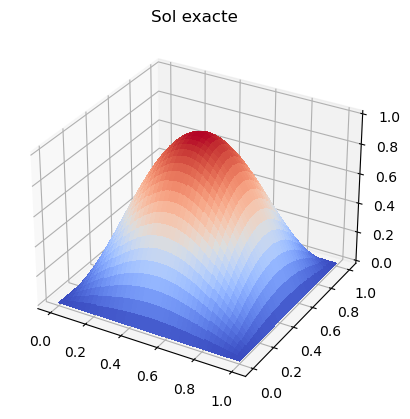

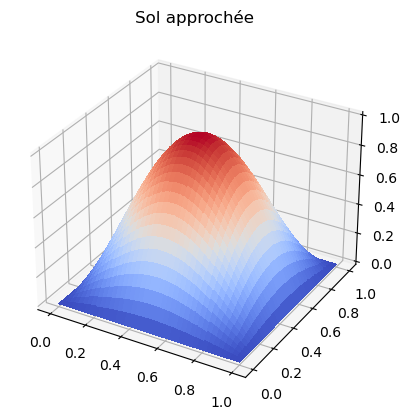

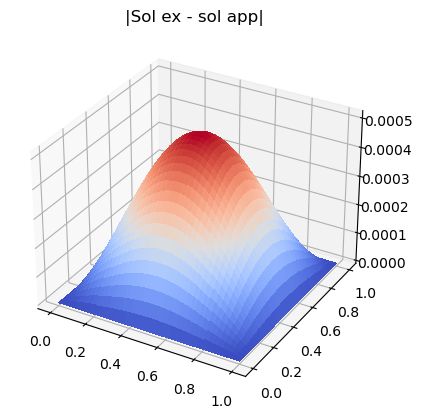

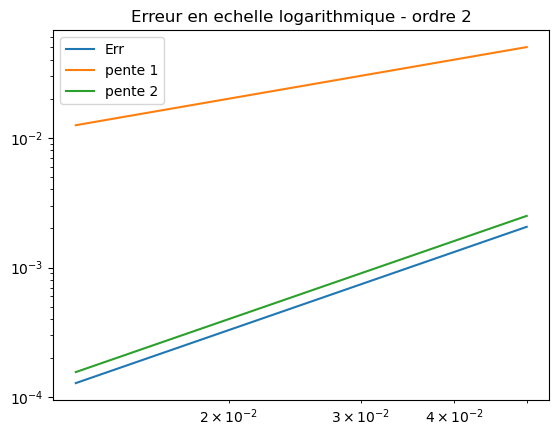

In [8]:
Nx=19
Ny=19

x=np.linspace(0,1,Nx+1)
y=np.linspace(0,1,Ny+1)

X,Y=np.meshgrid(x,y)

def u(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)

Z=u(X,Y)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#fig = plt.figure()
#ax = fig.gca(projection='3d')

#ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0, antialiased=False)

def u(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)

def f(x,y):
    return 2*((np.pi)**2)*np.sin(np.pi*x)*np.sin(np.pi*y)

def B(M):
    C=-4*np.eye(M)+np.diag(np.ones(M-1),1)+np.diag(np.ones(M-1),-1)
    BB=np.kron(np.eye(M),C)+np.kron(np.diag(np.ones(M-1),1),np.eye(M))+np.kron(np.diag(np.ones(M-1),-1),np.eye(M))
    return BB

M=39
Nx=M
Ny=M

h=(b-a)/(M+1)

a=0
b=1
c=0
d=1

x=np.linspace(a,b,Nx+2)
y=np.linspace(c,d,Ny+2)

X,Y=np.meshgrid(x,y)
Xint,Yint=np.meshgrid(x[1:-1],y[1:-1])

FF=f(Xint,Yint)
F=-(h**2)*FF.reshape(M**2,1)

U=np.zeros((M+2,M+2))
UU=np.linalg.solve(B(M),F)
U[1:-1,1:-1]=UU.reshape(M,M)

Z=u(X,Y)

fig1 = plt.figure(1)
ax = fig1.add_subplot(projection='3d')

ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title("Sol exacte")

fig2 = plt.figure(2)
ax = fig2.add_subplot(projection='3d')

ax.plot_surface(X,Y,U,cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title("Sol approchée")

fig3 = plt.figure(3)
ax = fig3.add_subplot(projection='3d')

ax.plot_surface(X,Y,abs(U-Z),cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title("|Sol ex - sol app|")

## ---- calcul erreur

MM=[19,39,79]

vecE=[]
vecH=[]
    
for M in MM:
    h=(b-a)/(M+1)
    x=np.linspace(a,b,M+2)
    y=np.linspace(c,d,M+2)

    X,Y=np.meshgrid(x,y)
    Xint,Yint=np.meshgrid(x[1:-1],y[1:-1])

    FF=f(Xint,Yint)
    F=-(h**2)*FF.reshape(M**2,1)

    U=np.zeros((M+2,M+2))
    UU=np.linalg.solve(B(M),F)
    U[1:-1,1:-1]=UU.reshape(M,M)

    Z=u(X,Y)
    
    vecE.append(np.max(np.abs(U-Z)))
    vecH.append(h)
   


plt.figure(4)
plt.loglog(vecH,vecE,label='Err')
plt.loglog(np.array(vecH),np.array(vecH),label='pente 1')
plt.loglog(np.array(vecH),np.array(vecH)**2,label='pente 2')
plt.legend()
plt.title('Erreur en echelle logarithmique - ordre 2')









**Exercice 4 - Une équation non linéaire**

On considère ici l'équation du pendule suspendu à un fil rigide vertical 

$$
\theta'(t)=-\sin(\theta(t)),
$$

où $\theta$ représente l'angle du pendule avec l'axe vertical à l'instant $t$. Le plus naturel est de voir ce problème comme une équation différentielle ordinaire et de donner la position initiale $\theta(0)$ du pendule et sa vitesse angulaire initiale $\theta'(0)$ à l'instant initial $t=0$. Mais ici on va considérer que l'on part d'une position initiale $\theta(0)$ connue, à une vitesse inconnue, de sort qu'à un instant $T>0$ le pendule sera à la position $\theta(T)=\beta$ connue. Ce problème donne alors lieu au problème aux limites suivant :

$$
\begin{cases}
\theta'(t)=-\sin(\theta(t)),\ t\in]0,T[,\\
\theta(0)=\alpha,\ \theta(T)=\beta.
\end{cases}
$$

En utilisant le même type de notations que dans l'exercice 1, on discrétise ce problème par le sytème d'équations

$$
\frac{\theta_{i+1}-2\theta_i+\theta_{i-1}}{h^2}+\sin(\theta_i)=0,\ i=1,\dots,M,
$$

avec

$$
\theta_0=\alpha,\ \theta_{M+1}=\beta.
$$

On remarque alors que le problème discret correspond à un système de $M$ équations non linéaires. Pour le résoudre, on va utiliser la méthode de Newton.

**Question 1**. Écrire le système non linéaire sous la forme $G(Y)=0$, avec $G:\RR^M\longrightarrow\RR^M$ une fonction que l'on donnera. Donner la matrice jacobienne de $G$ en un point $Y\in\RR^M$.

**Question 2.** Écrire l'algorithme de la méthode de Newton pour résoudre l'équation $G(Y)=0$.

**Question 3.** Écrire un programme donnant la solution du problème dans le cas $T=2\pi,\ \alpha=\beta=0.7$. Pour initialiser la méthode de Newton, on pourra considérer le vecteur $Y_0\in\RR^M$ tel que $(Y_0)_i=0.7$, pour tout $i\in\{1,\dots,M\}.$ Représenter la solution approchée obtenue.  

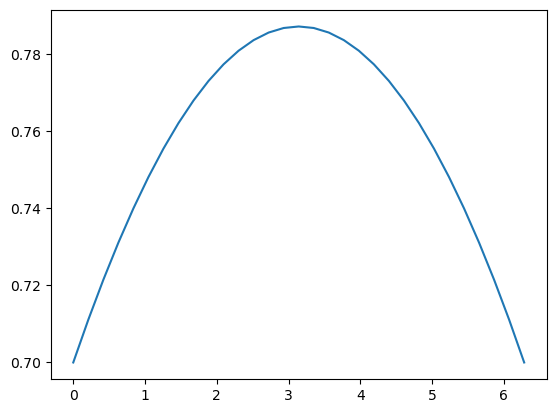

In [9]:
def A(n):
    return 2*np.eye(n)-np.diag(np.ones(n-1),1)-np.diag(np.ones(n-1),-1)

def F(Y,alpha=0.7,beta=0.7):
    n=np.size(Y)
    FF=np.zeros(np.shape(Y))
    FF[0]=alpha*(n+1)**2
    FF[-1]=beta*(n+1)**2
    return np.dot(-A(n)*(n+1)**2,Y)+np.sin(Y)+FF

def DF(Y,alpha=0.7,beta=0.7):
    n=np.size(Y)
    return -A(n)*(n+1)**2+np.diag(np.cos(Y))

def Newton(F,DF,Y0,tol,itmax):
    Y=Y0
    it=1
    while it<itmax and np.linalg.norm(F(Y))>tol:
        B=DF(Y)
        Y=Y-np.dot(np.linalg.inv(B),F(Y))
        it+=1
    return it,Y

M=29

theta0=0.7*np.ones(M)
tt=np.linspace(0,2*np.pi,M+2)

theta=np.zeros(M+2)
theta[0]=0.7
theta[-1]=0.7

it,theta[1:-1]=Newton(F,DF,theta0,10**(-6),4)

# from scipy.optimize import fsolve

# theta[1:-1]=fsolve(F,theta0)
plt.plot(tt,theta)
